In [1]:
import pandas as pd
import numpy as np
import string

In [6]:
lines= pd.read_table('C:/Users/82104/Desktop/english to french.txt', names=['eng', 'fr'])
# 구분다의 default는 \t임. sep='\t'

In [7]:
lines = lines[0:50000] # 14만개중 5만개만 불러옴. 조금만살펴보기위해
print(lines.head(3))
print(lines.tail(3))

    eng        fr
0   Go.      Va !
1  Run!   Cours !
2  Run!  Courez !
                            eng                              fr
49997  They go to work on foot.     Ils vont au travail à pied.
49998  They got into the train.    Ils montèrent dans le train.
49999  They got into the train.  Elles montèrent dans le train.


In [8]:
lines['eng']=lines['eng'].apply(lambda x: x.lower()) 
# pandas에 있는 method apply 임. x.lower()은 대소문자 낮춤.
# 잊지말것. 여기서 표현하는 apply(lambda x:)의 x는 .apply 앞에있는 lines['eng'] 에 해당.
lines['fr']=lines['fr'].apply(lambda x: x.lower())

In [9]:
string.punctuation #번역에 도움되지 않은것들 다 지워버리기 위해 처리함.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
set(string.punctuation) #집합 표현

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [11]:
exclude = set(string.punctuation)

lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
# exclude안에 있지 않은 ch들에 대해, 그리고 x안에 있는 ch에 대해서만 join 시켜라. 
lines.fr=lines.fr.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [12]:
lines.fr # 이렇게 해도 불러들일 수 있음. (pandas 열)

0                                     va 
1                                  cours 
2                                 courez 
3                               ça alors 
4                                 au feu 
                       ...               
49995      ils nous donnèrent leur parole
49996    elles nous donnèrent leur parole
49997          ils vont au travail à pied
49998         ils montèrent dans le train
49999       elles montèrent dans le train
Name: fr, Length: 50000, dtype: object

In [13]:
print(lines.head(3))
print(lines.tail(3))

   eng       fr
0   go      va 
1  run   cours 
2  run  courez 
                           eng                             fr
49997  they go to work on foot     ils vont au travail à pied
49998  they got into the train    ils montèrent dans le train
49999  they got into the train  elles montèrent dans le train


In [14]:
lines.fr = lines.fr.apply(lambda x : 'start '+ x + ' end')
# start 와 end로 확실하게 정해줌. 
# 뒤의 머신번역에서 굉장히 유용하게 사용한다.teacher forcing에서 유용하게 씀.

In [15]:
print(lines.head(3))
print(lines.tail(3))

   eng                 fr
0   go      start va  end
1  run   start cours  end
2  run  start courez  end
                           eng                                       fr
49997  they go to work on foot     start ils vont au travail à pied end
49998  they got into the train    start ils montèrent dans le train end
49999  they got into the train  start elles montèrent dans le train end


In [16]:
lines.shape # numpy든 pandas든 shape이 둘 다 있음.

(50000, 2)

In [17]:
# fit a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines) # 1줄씩 안해도 대량으로 가능.
    return tokenizer

In [18]:
import json
eng_tokenizer = create_tokenizer(lines['eng']) # 파이썬 형태의 dict가 아님.
eng_dict=json.loads(json.dumps(eng_tokenizer.word_counts)) # dumps를 통해 json style로 바꿈.
# 그리고 loads를 부름. 

# JSON (JavaScript Object Notation)
# 효율적으로 데이터를 저장하고 교환(exchange data)하는데 사용하는 텍스트 데이터 포맷 중의 하나입니다. 
# JSON은 사람이 읽고 쓰기에 쉬우며, 또한 기계가 파싱하고 생성하기도에 쉽습니다.
# 출처 : https://rfriend.tistory.com/474 



In [19]:
eng_tokenizer

In [20]:
eng_tokenizer.word_counts # OrderedDict로 되어있음.

OrderedDict([('go', 1155),
             ('run', 88),
             ('wow', 5),
             ('fire', 49),
             ('help', 433),
             ('jump', 19),
             ('stop', 332),
             ('wait', 166),
             ('on', 796),
             ('i', 11307),
             ('see', 461),
             ('try', 265),
             ('won', 59),
             ('oh', 19),
             ('no', 891),
             ('attack', 13),
             ('cheers', 4),
             ('get', 675),
             ('up', 665),
             ('now', 539),
             ('got', 460),
             ('it', 3616),
             ('hop', 2),
             ('in', 1074),
             ('hug', 26),
             ('me', 2348),
             ('fell', 56),
             ('know', 718),
             ('left', 158),
             ('lost', 219),
             ('im', 2534),
             ('19', 2),
             ('ok', 90),
             ('listen', 49),
             ('way', 188),
             ('really', 427),
             ('thanks', 64),
  

In [21]:
json.dumps(eng_tokenizer.word_counts)

'{"go": 1155, "run": 88, "wow": 5, "fire": 49, "help": 433, "jump": 19, "stop": 332, "wait": 166, "on": 796, "i": 11307, "see": 461, "try": 265, "won": 59, "oh": 19, "no": 891, "attack": 13, "cheers": 4, "get": 675, "up": 665, "now": 539, "got": 460, "it": 3616, "hop": 2, "in": 1074, "hug": 26, "me": 2348, "fell": 56, "know": 718, "left": 158, "lost": 219, "im": 2534, "19": 2, "ok": 90, "listen": 49, "way": 188, "really": 427, "thanks": 64, "we": 1765, "ask": 124, "tom": 2593, "awesome": 36, "be": 1315, "calm": 32, "cool": 42, "fair": 39, "kind": 96, "nice": 171, "beat": 20, "call": 170, "us": 420, "come": 495, "drop": 38, "out": 578, "away": 135, "slow": 25, "goodbye": 8, "hang": 16, "he": 3027, "quit": 85, "runs": 13, "hold": 45, "agree": 73, "drive": 65, "tried": 89, "ill": 743, "fat": 50, "fit": 29, "hit": 49, "sad": 70, "shy": 32, "wet": 19, "its": 1279, "join": 35, "keep": 223, "kiss": 58, "too": 485, "open": 155, "perfect": 64, "you": 8787, "show": 121, "shut": 77, "so": 542, "l

In [22]:
eng_dict

{'go': 1155,
 'run': 88,
 'wow': 5,
 'fire': 49,
 'help': 433,
 'jump': 19,
 'stop': 332,
 'wait': 166,
 'on': 796,
 'i': 11307,
 'see': 461,
 'try': 265,
 'won': 59,
 'oh': 19,
 'no': 891,
 'attack': 13,
 'cheers': 4,
 'get': 675,
 'up': 665,
 'now': 539,
 'got': 460,
 'it': 3616,
 'hop': 2,
 'in': 1074,
 'hug': 26,
 'me': 2348,
 'fell': 56,
 'know': 718,
 'left': 158,
 'lost': 219,
 'im': 2534,
 '19': 2,
 'ok': 90,
 'listen': 49,
 'way': 188,
 'really': 427,
 'thanks': 64,
 'we': 1765,
 'ask': 124,
 'tom': 2593,
 'awesome': 36,
 'be': 1315,
 'calm': 32,
 'cool': 42,
 'fair': 39,
 'kind': 96,
 'nice': 171,
 'beat': 20,
 'call': 170,
 'us': 420,
 'come': 495,
 'drop': 38,
 'out': 578,
 'away': 135,
 'slow': 25,
 'goodbye': 8,
 'hang': 16,
 'he': 3027,
 'quit': 85,
 'runs': 13,
 'hold': 45,
 'agree': 73,
 'drive': 65,
 'tried': 89,
 'ill': 743,
 'fat': 50,
 'fit': 29,
 'hit': 49,
 'sad': 70,
 'shy': 32,
 'wet': 19,
 'its': 1279,
 'join': 35,
 'keep': 223,
 'kiss': 58,
 'too': 485,
 'ope

In [23]:
df =pd.DataFrame([eng_dict.keys(), eng_dict.values()]).T

In [24]:
# 아래는 바로 위 코드를 보는데 참고.
pd.DataFrame([eng_dict.keys(), eng_dict.values()])

,0,1,2,3,4,5,6,7,8,9,...,6074,6075,6076,6077,6078,6079,6080,6081,6082,6083
0,go,run,wow,fire,help,jump,stop,wait,on,i,...,muscles,exits,breeze,railroads,originals,ruins,gathering,funds,border,themselves
1,1155,88,5,49,433,19,332,166,796,11307,...,1,1,1,1,2,1,1,2,4,4


In [25]:
# 아래는 바로 위위 코드를 보는데 참고.
pd.DataFrame([eng_dict.keys(), eng_dict.values()]).T

,0,1
0,go,1155
1,run,88
2,wow,5
3,fire,49
4,help,433
5,jump,19
6,stop,332
7,wait,166
8,on,796
9,i,11307


In [26]:
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False) # count열의 값 기준으로 정렬. 내림차순.

In [27]:
df

,word,count
9,i,11307
78,you,8787
92,a,4899
215,is,4468
568,the,3808
21,it,3616
210,to,3614
57,he,3027
39,tom,2593
30,im,2534


In [28]:
df['cum_count']=df['count'].cumsum()

In [29]:
df['cum_perc'] = df['cum_count']/df['cum_count'].max()
final_eng_words = df[df['cum_perc']<0.8]['word'].values # 누적비율이 80% 미만인 것들만 단어로 뽑음.
# 앞에서 80%에 해당하는 단어들만 사용한다는 뜻.

In [30]:
df

,word,count,cum_count,cum_perc
9,i,11307,11307,0.057204
78,you,8787,20094,0.101659
92,a,4899,24993,0.126444
215,is,4468,29461,0.149048
568,the,3808,33269,0.168313
21,it,3616,36885,0.186607
210,to,3614,40499,0.204891
57,he,3027,43526,0.220205
39,tom,2593,46119,0.233324
30,im,2534,48653,0.246144


In [31]:
# 마찬가지로 fr에 대해서도 적용.
fr_tokenizer = create_tokenizer(lines['fr'])
fr_dict = json.loads(json.dumps(fr_tokenizer.word_counts))
df =pd.DataFrame([fr_dict.keys(), fr_dict.values()]).T
df.columns = ['word','count']
df = df.sort_values(by='count',ascending = False)
df['cum_count']=df['count'].cumsum()
df['cum_perc'] = df['cum_count']/df['cum_count'].max()
final_fr_words = df[df['cum_perc']<0.8]['word'].values

In [32]:
# 이러면, 5만개의 단어중 387, 306개의 단어만 살아남음.
print(len(final_eng_words),len(final_fr_words))

384 357


In [33]:
final_eng_words

array(['i', 'you', 'a', 'is', 'the', 'it', 'to', 'he', 'tom', 'im', 'me',
       'do', 'are', 'this', 'that', 'dont', 'was', 'youre', 'we', 'not',
       'my', 'have', 'your', 'did', 'be', 'were', 'all', 'she', 'its',
       'they', 'like', 'can', 'what', 'go', 'of', 'in', 'very', 'want',
       'no', 'how', 'here', 'him', 'on', 'cant', 'ill', 'thats', 'for',
       'know', 'get', 'up', 'need', 'out', 'at', 'just', 'one', 'his',
       'so', 'now', 'why', 'good', 'there', 'please', 'come', 'with',
       'hes', 'think', 'has', 'too', 'will', 'her', 'love', 'see', 'got',
       'look', 'help', 'am', 'really', 'us', 'had', 'who', 'right',
       'take', 'didnt', 'well', 'let', 'where', 'theyre', 'an', 'feel',
       'must', 'home', 'lets', 'stop', 'made', 'happy', 'back', 'about',
       'ive', 'work', 'time', 'still', 'whats', 'give', 'going', 'may',
       'never', 'them', 'tell', 'car', 'leave', 'alone', 'try', 'busy',
       'could', 'say', 'went', 'saw', 'make', 'much', 'isnt', 'sho

In [ ]:
# 그렇다면, 나머지 4만9천개 이상에 해당하는 대부분의 단어를 unknown에 할당하는 법을 살펴보자.

In [34]:
def filter_eng_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_eng_words:
      t.append(x[i])
    else:
      t.append('unk') #unknown 할당
  # 이렇게 하면 t에는 list로 나와있음.

  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' ' # output을 문장으로 구성하는 함수.
  return x3

In [35]:
filter_eng_words('he is extremely good') #이렇게 바뀐다. (예시)

'he is unk good '

In [36]:
def filter_fr_words(x):
  t = []
  x = x.split()
  for i in range(len(x)):
    if x[i] in final_fr_words:
      t.append(x[i])
    else:
      t.append('unk')
  x3 = ''
  for i in range(len(t)):
    x3 = x3+t[i]+' '
  return x3

In [37]:
lines['eng']=lines['eng'].apply(filter_eng_words) 
# apply는 함수를 인자로 받는 메서드이다.
# for 문을 사용하지 않고, apply를 쓰면 매우 간단히 됨. 꼭 기억하기. 

In [38]:
lines['fr']=lines['fr'].apply(filter_fr_words) # 위에서 함수정의한 대로 바꿔버림.

In [39]:
lines['fr']

0                              start va end 
1                             start unk end 
2                             start unk end 
3                          start ça unk end 
4                          start au unk end 
                        ...                 
49995        start ils nous unk unk unk end 
49996      start elles nous unk unk unk end 
49997    start ils unk au travail à unk end 
49998       start ils unk dans le train end 
49999     start elles unk dans le train end 
Name: fr, Length: 50000, dtype: object

In [40]:
# unk를 고려해서 다시 만듦.

all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words: #없으면 하나씩 추가.
            all_eng_words.add(word)
    
all_french_words=set()
for fr in lines.fr:
    for word in fr.split():
        if word not in all_french_words:
            all_french_words.add(word)

In [41]:
len(all_eng_words) 

385

In [42]:
list(all_eng_words)

['wasnt',
 'likes',
 'and',
 'whos',
 'any',
 'safe',
 'yourself',
 'right',
 'didnt',
 'see',
 'mother',
 'isnt',
 'hot',
 'that',
 'anybody',
 'shes',
 'kids',
 'saw',
 'heard',
 'lot',
 'thats',
 'meet',
 'get',
 'funny',
 'at',
 'next',
 'everyone',
 'happy',
 'tried',
 'lost',
 'many',
 'eat',
 'to',
 'where',
 'job',
 'her',
 'dont',
 'everything',
 'take',
 'love',
 'hurry',
 'read',
 'used',
 'long',
 'again',
 'down',
 'father',
 'understand',
 'miss',
 'often',
 'sleep',
 'wanted',
 'over',
 'bit',
 'left',
 'plan',
 'hat',
 'man',
 'answer',
 'day',
 'by',
 'music',
 'been',
 'sick',
 'loves',
 'coming',
 'theyre',
 'pretty',
 'stupid',
 'soon',
 'mary',
 'fine',
 'cold',
 'them',
 'us',
 'hes',
 'has',
 'someone',
 'drive',
 'free',
 'id',
 'put',
 'big',
 'last',
 'getting',
 'lets',
 'room',
 'how',
 'give',
 'into',
 'in',
 'hate',
 'youre',
 'true',
 'sit',
 'toms',
 'problem',
 'use',
 'study',
 'knows',
 'easy',
 'find',
 'ok',
 'glad',
 'still',
 'anything',
 'cat',


In [46]:
input_words # 아래 돌리고 위 돌리기

['a',
 'about',
 'afraid',
 'again',
 'agree',
 'all',
 'almost',
 'alone',
 'already',
 'always',
 'am',
 'an',
 'and',
 'angry',
 'answer',
 'any',
 'anybody',
 'anyone',
 'anything',
 'are',
 'arent',
 'as',
 'ask',
 'asked',
 'at',
 'away',
 'back',
 'bad',
 'be',
 'beautiful',
 'bed',
 'been',
 'being',
 'believe',
 'best',
 'better',
 'bicycle',
 'big',
 'bit',
 'book',
 'books',
 'both',
 'bought',
 'boy',
 'bring',
 'broke',
 'busy',
 'buy',
 'by',
 'call',
 'called',
 'came',
 'can',
 'cant',
 'car',
 'care',
 'careful',
 'cat',
 'caught',
 'close',
 'coffee',
 'cold',
 'come',
 'coming',
 'could',
 'crazy',
 'day',
 'dead',
 'did',
 'didnt',
 'die',
 'died',
 'do',
 'does',
 'doesnt',
 'dog',
 'doing',
 'done',
 'dont',
 'door',
 'down',
 'drink',
 'drive',
 'drunk',
 'early',
 'easy',
 'eat',
 'else',
 'english',
 'enjoy',
 'enough',
 'everybody',
 'everyone',
 'everything',
 'eyes',
 'fast',
 'father',
 'feel',
 'felt',
 'find',
 'fine',
 'finished',
 'first',
 'food',
 'fo

In [47]:
input_words = sorted(list(all_eng_words)) #정렬
target_words = sorted(list(all_french_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_french_words)
# del all_eng_words, all_french_words

# 우리는 영어-> 불어로 바꿀 꺼임.

In [48]:
set(all_french_words) - set(final_fr_words)  # 차집합

{'unk'}

In [49]:
print(len(all_french_words))
print(len(final_fr_words))

358
357


In [50]:
len(all_eng_words)

385

In [51]:
len(target_words)

358

In [52]:
input_token_index = dict(
    [(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict(
    [(word, i+1) for i, word in enumerate(target_words)])

In [53]:
input_token_index

{'a': 1,
 'about': 2,
 'afraid': 3,
 'again': 4,
 'agree': 5,
 'all': 6,
 'almost': 7,
 'alone': 8,
 'already': 9,
 'always': 10,
 'am': 11,
 'an': 12,
 'and': 13,
 'angry': 14,
 'answer': 15,
 'any': 16,
 'anybody': 17,
 'anyone': 18,
 'anything': 19,
 'are': 20,
 'arent': 21,
 'as': 22,
 'ask': 23,
 'asked': 24,
 'at': 25,
 'away': 26,
 'back': 27,
 'bad': 28,
 'be': 29,
 'beautiful': 30,
 'bed': 31,
 'been': 32,
 'being': 33,
 'believe': 34,
 'best': 35,
 'better': 36,
 'bicycle': 37,
 'big': 38,
 'bit': 39,
 'book': 40,
 'books': 41,
 'both': 42,
 'bought': 43,
 'boy': 44,
 'bring': 45,
 'broke': 46,
 'busy': 47,
 'buy': 48,
 'by': 49,
 'call': 50,
 'called': 51,
 'came': 52,
 'can': 53,
 'cant': 54,
 'car': 55,
 'care': 56,
 'careful': 57,
 'cat': 58,
 'caught': 59,
 'close': 60,
 'coffee': 61,
 'cold': 62,
 'come': 63,
 'coming': 64,
 'could': 65,
 'crazy': 66,
 'day': 67,
 'dead': 68,
 'did': 69,
 'didnt': 70,
 'die': 71,
 'died': 72,
 'do': 73,
 'does': 74,
 'doesnt': 75,
 'dog

In [54]:
num_decoder_tokens

358

In [55]:
input_token_index

{'a': 1,
 'about': 2,
 'afraid': 3,
 'again': 4,
 'agree': 5,
 'all': 6,
 'almost': 7,
 'alone': 8,
 'already': 9,
 'always': 10,
 'am': 11,
 'an': 12,
 'and': 13,
 'angry': 14,
 'answer': 15,
 'any': 16,
 'anybody': 17,
 'anyone': 18,
 'anything': 19,
 'are': 20,
 'arent': 21,
 'as': 22,
 'ask': 23,
 'asked': 24,
 'at': 25,
 'away': 26,
 'back': 27,
 'bad': 28,
 'be': 29,
 'beautiful': 30,
 'bed': 31,
 'been': 32,
 'being': 33,
 'believe': 34,
 'best': 35,
 'better': 36,
 'bicycle': 37,
 'big': 38,
 'bit': 39,
 'book': 40,
 'books': 41,
 'both': 42,
 'bought': 43,
 'boy': 44,
 'bring': 45,
 'broke': 46,
 'busy': 47,
 'buy': 48,
 'by': 49,
 'call': 50,
 'called': 51,
 'came': 52,
 'can': 53,
 'cant': 54,
 'car': 55,
 'care': 56,
 'careful': 57,
 'cat': 58,
 'caught': 59,
 'close': 60,
 'coffee': 61,
 'cold': 62,
 'come': 63,
 'coming': 64,
 'could': 65,
 'crazy': 66,
 'day': 67,
 'dead': 68,
 'did': 69,
 'didnt': 70,
 'die': 71,
 'died': 72,
 'do': 73,
 'does': 74,
 'doesnt': 75,
 'dog

In [58]:
print(input_token_index['unk']) 
print(target_token_index['start'])
print(target_token_index['end'])
print(list(input_token_index.keys())[335]) # 0부터 시작하므로.
print(list(target_token_index.keys())[283])
print(list(target_token_index.keys())[88])

336
284
89
unk
start
end


In [59]:
length_list=[]
for l in lines.fr:
    length_list.append(len(l.split(' ')))
fr_max_length = np.max(length_list) # 가장 긴 문장의 길이

In [60]:
length_list # 문장의 길이들.

[4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 6,
 5,
 4,
 4,
 4,
 6,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 7,
 7,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 4,
 6,
 4,
 6,
 5,
 7,
 8,
 5,
 6,
 6,
 4,
 4,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 6,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 4,
 4,
 6,
 5,
 5,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 7,
 5,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 8,
 8,
 5,
 4,
 5,
 5,
 4,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 6,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 4,
 4,
 4,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 9,
 4,
 6,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 6,
 5,
 5,


In [61]:
length_list=[]
for l in lines.eng:
    length_list.append(len(l.split(' ')))
eng_max_length = np.max(length_list)

In [62]:
print(eng_max_length)
print(fr_max_length)

8
17


In [63]:
encoder_input_data = np.zeros(
    (len(lines['eng']), eng_max_length),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(lines['fr']), fr_max_length),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(lines['fr']), fr_max_length, num_decoder_tokens+1),
    dtype='float32') 
# 나중에 쓰려고 미리 만들어놈.
# 단어는 299개이고, +1은 0이 missing이라는걸 알리기 위해.

In [64]:
encoder_input_data.shape

(50000, 8)

In [65]:
decoder_target_data.shape

(50000, 17, 359)

In [66]:
lines['eng'] # unk로 바뀐 단어들.

0                            go 
1                           run 
2                           run 
3                           unk 
4                           unk 
                  ...           
49995     they gave us unk word 
49996     they gave us unk word 
49997    they go to work on unk 
49998     they got into the unk 
49999     they got into the unk 
Name: eng, Length: 50000, dtype: object

In [67]:
for i, (input_text, target_text) in enumerate(zip(lines['eng'], lines['fr'])):
    # 한문장씩 넣을껑미.
    for t, word in enumerate(input_text.split()): #각 단어를 살펴봄.
        encoder_input_data[i, t] = input_token_index[word]
    for t, word in enumerate(target_text.split()):
        decoder_input_data[i, t] = target_token_index[word]
        if t>0:
            decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            if t== len(target_text.split())-1: # 마지막일때,
                decoder_target_data[i, t:, 76] = 1 # end 이후에 나오는 것들을 모두 1로 만들어버림.

In [94]:
input_token_index

{'a': 1,
 'about': 2,
 'afraid': 3,
 'again': 4,
 'agree': 5,
 'all': 6,
 'almost': 7,
 'alone': 8,
 'already': 9,
 'always': 10,
 'am': 11,
 'an': 12,
 'and': 13,
 'angry': 14,
 'answer': 15,
 'any': 16,
 'anybody': 17,
 'anyone': 18,
 'anything': 19,
 'are': 20,
 "aren't": 21,
 'as': 22,
 'ask': 23,
 'asked': 24,
 'at': 25,
 'away': 26,
 'back': 27,
 'bad': 28,
 'be': 29,
 'beautiful': 30,
 'bed': 31,
 'been': 32,
 'being': 33,
 'believe': 34,
 'best': 35,
 'better': 36,
 'bicycle': 37,
 'big': 38,
 'bit': 39,
 'book': 40,
 'books': 41,
 'both': 42,
 'bought': 43,
 'boy': 44,
 'bring': 45,
 'broke': 46,
 'busy': 47,
 'buy': 48,
 'by': 49,
 'call': 50,
 'called': 51,
 'came': 52,
 'can': 53,
 "can't": 54,
 'car': 55,
 'care': 56,
 'careful': 57,
 'cat': 58,
 'caught': 59,
 'close': 60,
 'coffee': 61,
 'cold': 62,
 'come': 63,
 'coming': 64,
 'could': 65,
 'crazy': 66,
 'day': 67,
 'dead': 68,
 'did': 69,
 "didn't": 70,
 'die': 71,
 'died': 72,
 'do': 73,
 'does': 74,
 "doesn't": 75,
 

In [110]:
decoder_target_data # 프랑스어 문장 최대길이 17이라, 50000x17x300(W=299+1)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [69]:
target_token_index

{'a': 1,
 'acheté': 2,
 'ai': 3,
 'aider': 4,
 'aije': 5,
 'aime': 6,
 'aller': 7,
 'allez': 8,
 'allé': 9,
 'ami': 10,
 'amis': 11,
 'arrête': 12,
 'arrêtez': 13,
 'as': 14,
 'assez': 15,
 'astu': 16,
 'atil': 17,
 'au': 18,
 'aucun': 19,
 'aucune': 20,
 'aujourdhui': 21,
 'aussi': 22,
 'aux': 23,
 'avait': 24,
 'avec': 25,
 'avez': 26,
 'avezvous': 27,
 'avoir': 28,
 'avons': 29,
 'beaucoup': 30,
 'besoin': 31,
 'bien': 32,
 'bientôt': 33,
 'boire': 34,
 'bon': 35,
 'bonne': 36,
 'boulot': 37,
 'ce': 38,
 'ceci': 39,
 'cela': 40,
 'ces': 41,
 'cest': 42,
 'cet': 43,
 'cette': 44,
 'chambre': 45,
 'chance': 46,
 'chanter': 47,
 'chat': 48,
 'chercher': 49,
 'chez': 50,
 'chien': 51,
 'chose': 52,
 'colère': 53,
 'combien': 54,
 'comme': 55,
 'comment': 56,
 'confiance': 57,
 'connais': 58,
 'coup': 59,
 'crois': 60,
 'cétait': 61,
 'daccord': 62,
 'dans': 63,
 'dargent': 64,
 'dautre': 65,
 'de': 66,
 'demain': 67,
 'demandé': 68,
 'des': 69,
 'deux': 70,
 'devez': 71,
 'devrais': 72,

In [68]:
print(decoder_input_data.shape,encoder_input_data.shape,decoder_target_data.shape)

(50000, 17) (50000, 8) (50000, 17, 359)


In [70]:
for i in range(decoder_input_data.shape[0]):
    for j in range(decoder_input_data.shape[1]):
        if(decoder_input_data[i][j]==0):
            decoder_input_data[i][j] = 89

In [71]:
len(input_words)

385

In [114]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Bidirectional, RepeatVector, Dropout
model1 = Sequential()
model1.add(Embedding(len(input_words)+1, 128, input_length=eng_max_length))
# 1개는 맨 앞이 0이라고 했으므로 ,128개의 node 로 받음.
model1.add(Bidirectional(LSTM(256)))
model1.add(RepeatVector(fr_max_length))
# 반복해서 적용하려고. 찾아보기
# 우리는 many to many를 출력해야함. 잊지말기.
model1.add((LSTM(256, return_sequences=True)))
model1.add((Dense(len(target_token_index)+1, activation='softmax')))
# 각각의 1개에 대해, 256 * 300 + 300 의 mlp연산을 함.
# 0이 하나가 들어가있기 때문에, +1를 해줘야함. 
# 즉, 각각의 17개의 instance에 대해 동일한 parameter를 사용한다는 뜻.
# 이게 3d tensor의 MLP
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 128)            48128     
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               788480    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 17, 512)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 17, 256)           787456    
_________________________________________________________________
dense (Dense)                (None, 17, 300)           77100     
Total params: 1,701,164
Trainable params: 1,701,164
Non-trainable params: 0
_________________________________________________________________


In [118]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

In [119]:
history = model1.fit(encoder_input_data, decoder_target_data,
          batch_size=128,
          epochs=5,
          validation_split=0.05)

Train on 47500 samples, validate on 2500 samples
Epoch 1/5
 2048/47500 [>.............................] - ETA: 6:32 - loss: 3.3484 - acc: 0.6323

KeyboardInterrupt: 

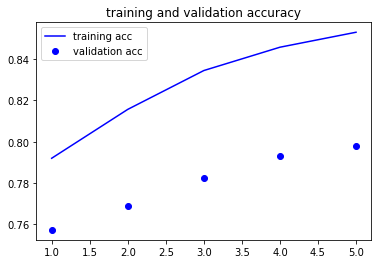

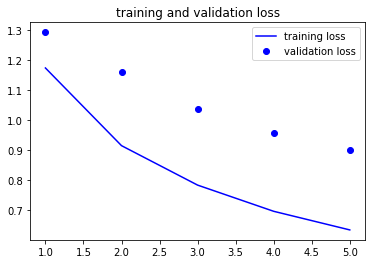

In [38]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()


In [39]:
count = 0
correct_count = 0
pred = model1.predict(encoder_input_data[47500:])
for i in range(2500):
    t = np.argmax(pred[i], axis=-1)
    act=np.argmax(decoder_target_data[47500+i], axis=-1)
    correct_count += np.sum((act==t) & (act!=76))
    count += np.sum(act!=76)
print(correct_count, count)
print(correct_count/count)

5324 13426
0.396544019067481


In [55]:
encoder_input_data[-2400]

array([155.,  98., 185., 336.,   0.,   0.,   0.,   0.], dtype=float32)

In [56]:
t = model1.predict(encoder_input_data[-2400].reshape(1,encoder_input_data.shape[1])).reshape(decoder_input_data.shape[1], num_decoder_tokens+1)
t2 = np.argmax(t,axis=1)
for i in range(len(t2)):
  if int(t2[i])!=0:
    print(list(target_token_index.keys())[int(t2[i]-1)])


je
me
unk
unk
unk
end
end
end
end
end
end
end
end
end
end
end
end
